In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def u_0(x, func='zero'):
    y = np.zeros_like(x)
    if func == 'square':
        y[np.where(abs(x)<0.5)] = 1
    if func == 'triangle':
        y = 1 - abs(x)
    if func == 'zero':
        y = np.zeros_like(x)
    if func == 'sin':
        y = np.sin(np.pi*x)
    return y

def u_l(t):
    return np.minimum(t,np.ones_like(t))
    #return np.sin(np.pi*(-1-t))
def u_r(t):
    return 0*np.minimum(t,np.ones_like(t))
    #return np.sin(np.pi*(1-t))
def u_t_0(x):
    return 0.0*np.ones_like(x)
    #return -np.pi*np.cos(np.pi*x)
def true(x,t):
    return np.sin(np.pi*(x-t))

In [22]:
def solver(dt = 2e-2, Th = 1.0, u_0 = u_0, u_l = u_l, u_r = u_r, method=1, dx=1e-2, u_t_0=u_t_0, true=true):
    l = (dt/dx)**2
    num_steps = int(Th/dt)
    num_points = int(2/dx) + 1

    x = np.linspace(-1,1, num_points)
    t = np.linspace(0,Th, num_steps)

    X,T = np.meshgrid(x,t)
    u = np.zeros_like(X)

    u[0,:] = u_0(x)
    u[:,0] = u_l(t)
    u[:,-1] = u_r(t)

    if method==1:
        u_1 = u_t_0(x)*dt + u[0,:]
    elif method == 2:
        u_1 = (2*u[0,:]*(1-l) + l*(np.roll(u[0,:],1) + np.roll(u[0,:],-1)) + 2*u_t_0(x)*dt)/2

    u[1,1:-1] = u_1[1:-1]

    A = np.diag((-2*l +2)*np.ones_like(x)) + l*(np.diag(np.ones_like(x[:-1]), -1) + np.diag(np.ones_like(x[:-1]), 1))

    for k in range(1,num_steps-1):
        u_new = A.dot(u[k,:]) - u[k-1,:]
        u[k+1,1:-1] = u_new[1:-1]
    
    error = np.mean(abs(u[-1,:] - true(x,T[-1,:])))
    return error, X,T,u

5.807202928416423e+220


(None,)

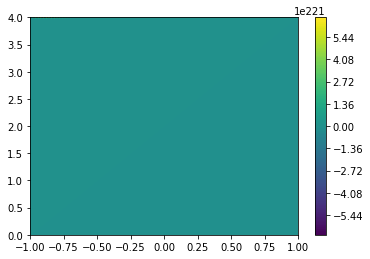

In [24]:
error, X,T,u=solver(Th=4.0,)
plt.contourf(X,T,u,200);
plt.colorbar()
print(error),

0.10738031179911177


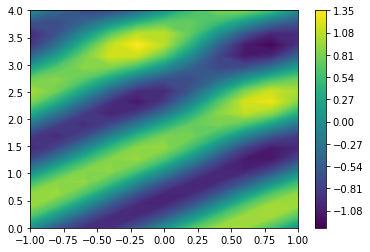

In [117]:
error, X2, T2, u2 = solver(method=2,Th=4.0)
plt.contourf(X2,T2,u2,200);
plt.colorbar()
print(error)

In [128]:
errors = []
DT = np.linspace(1e-5,2e-3,51)
for dt in DT:
    error, _,_,_ = solver(Th=40.0,dt=dt, dx=2e-2)
    errors.append(error)

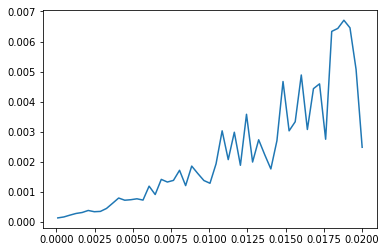

In [127]:
plt.plot(DT,errors)

In [110]:
np.mean(abs(u2[-1,:] - np.sin(np.pi*(X[-1,:]-T[-1,:]))))

0.10738031179911177